## ¿Hay alguna correlación entre la superficie por m2 y el precio por m2?
#### En principio podríamos creer que no. El precio por m2 no dependería de la superficie del departamento, sino que son otros los factores que condicionan este promedio

In [12]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')
pev7 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv')

In [14]:
#389594 entries
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389594 entries, 0 to 389593
Data columns (total 29 columns):
country_name                  131146 non-null object
created_on                    389594 non-null object
currency                      321983 non-null object
description                   255081 non-null object
expenses                      21657 non-null object
extra                         123943 non-null object
floor                         55013 non-null float64
geonames_id                   328381 non-null float64
id                            131146 non-null object
image_thumbnail               380067 non-null object
lat                           315425 non-null float64
lat-lon                       315425 non-null object
lon                           315420 non-null float64
operation                     389594 non-null object
place_name                    389563 non-null object
place_with_parent_names       389594 non-null object
price                         329113 no

In [15]:
import calendar
pev['fecha'] = pd.to_datetime(pev['created_on'])
pev['anio'] = pev['fecha'].map(lambda x:x.year)
pev['mes'] = pev['fecha'].map(lambda x:x.month)
pev.head(10)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,fecha,anio,mes
0,Argentina,2016-07-01,ARS,Corredor Responsable: Martin Eguiazu - CCI Mat...,NaN,NaN,NaN,3856022.0,3725ec6040dd4c59e6807752b23bc376fe927753,https://thumbs4.properati.com/8/JiQiOmUpHQ06Co...,...,house,NaN,Santa Fe,20.0,NaN,NaN,Venta de casa de 3 dormitorios,2016-07-01,2016,7
1,Argentina,2016-07-01,USD,Corredor Responsable: Uno Bienes Raices SRL - ...,NaN,NaN,1.0,3436109.0,d91f4f90ae4c28aff9d696dbee7e8d4fac154bc8,https://thumbs4.properati.com/4/bzYZriZno3lXfC...,...,apartment,4.0,Capital Federal,180.0,NaN,NaN,Hermoso Piso en Edificio de Estilo.4amb con dep.,2016-07-01,2016,7
2,Argentina,2016-07-01,NaN,"En lo mejor de Rumenco , se encuentra esta cas...",NaN,NaN,NaN,3430863.0,17760ecd8751167a1ce2eed3d589d390874213cd,https://thumbs4.properati.com/2/Ffvi9GU4qYv3lx...,...,house,5.0,Buenos Aires Costa Atlántica,260.0,NaN,787.0,"Casa Rumenco , Los Sauces",2016-07-01,2016,7
3,Argentina,2016-07-01,USD,Corredor Responsable: Luis Alberto De Blas - C...,NaN,NaN,NaN,NaN,8ac8b6411bffa318882cd2961c978cc931f35e93,https://thumbs4.properati.com/3/LxBdWMWXWHUxA8...,...,house,NaN,Buenos Aires Interior,20.0,NaN,NaN,A demoler Lote para emprendimiento,2016-07-01,2016,7
4,Argentina,2016-07-01,USD,Corredor Responsable: Luis Alberto De Blas - C...,NaN,NaN,NaN,NaN,a1ad15fd9cbe67ddb0a7a735c5c4b27099871707,https://thumbs4.properati.com/0/4ul13t9aSvCx4G...,...,house,NaN,Buenos Aires Interior,166.0,NaN,NaN,Casa una planta impecable.,2016-07-01,2016,7
5,Argentina,2016-07-01,NaN,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,NaN,NaN,NaN,NaN,201045bbf92f899b8680e15c0150cade5f9356da,https://thumbs4.properati.com/5/aiKEhatxLY0eEw...,...,PH,4.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,Duplex en Gonnet,2016-07-01,2016,7
6,Argentina,2016-07-01,NaN,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,NaN,NaN,NaN,3435379.0,ee91e0f6610207f559a531e0835b9e00b1b3d350,https://thumbs4.properati.com/7/JL807rO6nv2X52...,...,house,5.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,Casa en calle 446 - 24 y 25,2016-07-01,2016,7
7,Argentina,2016-07-01,ARS,Corredor Responsable: Joaquín Suárez - CI MAT ...,NaN,NaN,3.0,3838574.0,a97107f2a9efee83cd661aad0c0b64dc0f5e24b4,https://thumbs4.properati.com/7/KhdjsHUuRQ0blH...,...,apartment,NaN,Santa Fe,48.0,NaN,NaN,Vendo departamento céntrico de un dormitorio,2016-07-01,2016,7
8,Argentina,2016-07-01,ARS,Corredor Responsable: Joaquín Suárez - CI MAT ...,NaN,NaN,4.0,3838574.0,6ef9666eb3d92b73d843eb89fdd726c4d2a6c20e,https://thumbs4.properati.com/4/GLqBP_shBxRC6y...,...,apartment,NaN,Santa Fe,37.0,NaN,NaN,Vendo monoambiente céntrico,2016-07-01,2016,7
9,Argentina,2016-07-01,ARS,Corredor Responsable: Joaquín Suárez - CI MAT ...,NaN,NaN,3.0,3838574.0,64c50fe56da2280ca66d2579724ce3ad3a13e312,https://thumbs4.properati.com/1/wY0vUWZlBDBEgV...,...,apartment,NaN,Santa Fe,48.0,NaN,NaN,Vendo departamento céntrico de un dormitorio,2016-07-01,2016,7


In [18]:
def definirSuperficie(x):
    if x(24) != 'Nan':
        return x(24)
    if x(23) != 'Nan':
        return x(23)
    else: return 'Nan'
    
pev.dropna(subset=['surface_total_in_m2', 'price_usd_per_m2'], inplace=True)
#pev['surface'] = pev.apply(definirSuperficie, axis=1)

In [48]:
pev_sup = pev.loc[(pev.price_usd_per_m2 < 10000) & (pev.surface_total_in_m2 < 1000),['surface_total_in_m2', 'price_usd_per_m2']]
pev_sup.head(100)

,surface_total_in_m2,price_usd_per_m2
12,38.0,2368.421053
13,63.0,1301.587302
15,220.0,659.090909
16,59.0,1576.271186
17,59.0,1576.271186
18,59.0,1576.271186
19,59.0,1576.271186
20,55.0,1690.909091
21,55.0,1690.909091
22,55.0,1690.909091


In [49]:
pev_sup['price_usd_per_m2'] = pev_sup['price_usd_per_m2'].apply(lambda x: round(x, 2))
pev_sup['surface_total_in_m2'] = pev_sup['surface_total_in_m2'].apply(lambda x: int(x))
pev_sup.head(10)

,surface_total_in_m2,price_usd_per_m2
12,38,2368.42
13,63,1301.59
15,220,659.09
16,59,1576.27
17,59,1576.27
18,59,1576.27
19,59,1576.27
20,55,1690.91
21,55,1690.91
22,55,1690.91


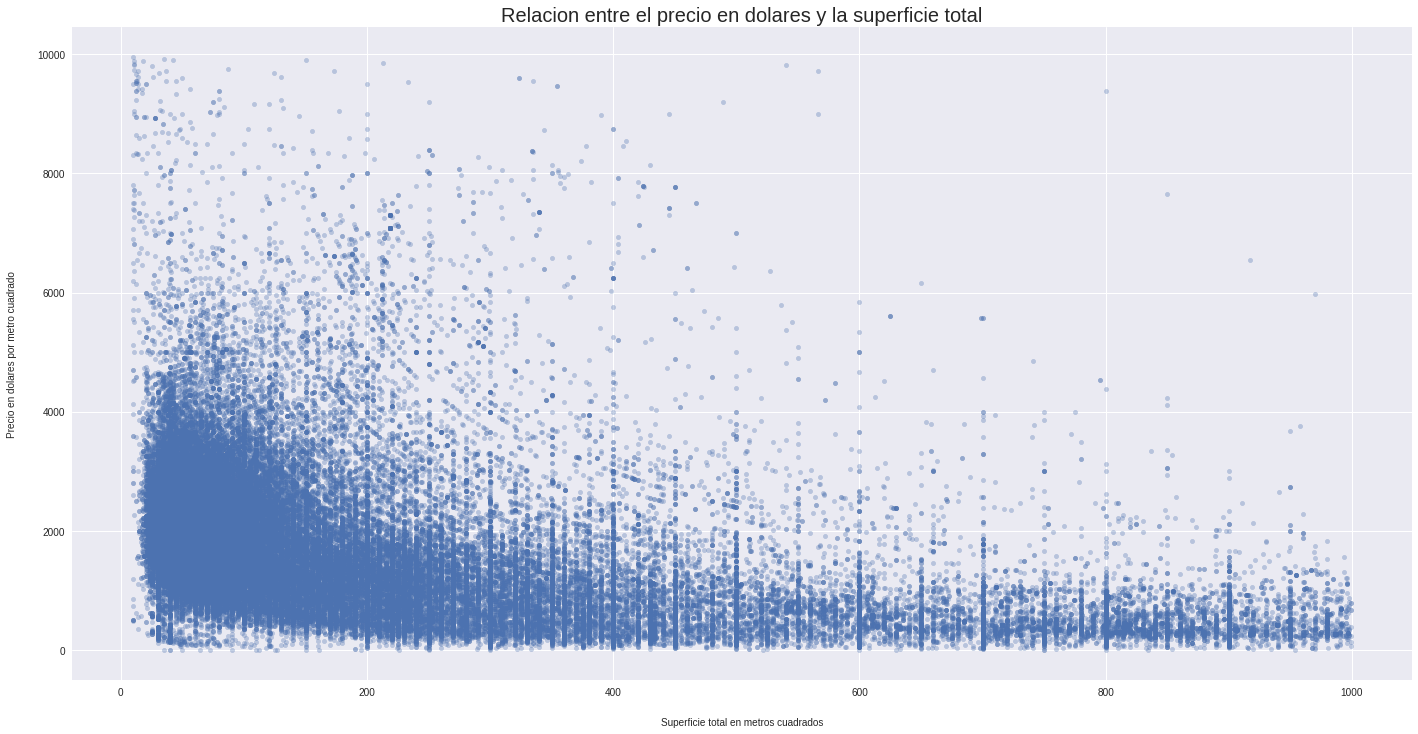

In [55]:
fig = plt.figure()
ax = plt.subplot(111)
pev_sup.plot.scatter('surface_total_in_m2','price_usd_per_m2',alpha=0.32,figsize=(24,12),ax=ax);
ax.set_ylabel('Precio en dolares por metro cuadrado',size=10.0,labelpad=20.0)
ax.set_xlabel('Superficie total en metros cuadrados', size=10.0,labelpad=20.0)
#ax.set_xlim(0,2000);
ax.set_title('Relacion entre el precio en dolares y la superficie total', fontsize=15, size= 20.0)
